### 리드미 용 그래프

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

이상치 탐색

In [2]:
data_dir = 'C:\\KIMUJUNG\\team_project\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_total.csv")
df.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
0,94959,1,0,NaN,7,20110914,0,0,870,3981,...,30,11509,1551,1074,1030,26891,29141,7395726.684,20150101,20170331
1,6597367,4,30,male,9,20110916,0,0,603,2980,...,21,77,22,16,44,658,287,171508.646,20150209,20170331
2,3629318,5,34,male,9,20110916,1,0,360,1072,...,2,145,84,58,42,1678,1158,448313.054,20160822,20170330


In [ ]:
data_dir = 'D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_total.csv")
df.head(3)

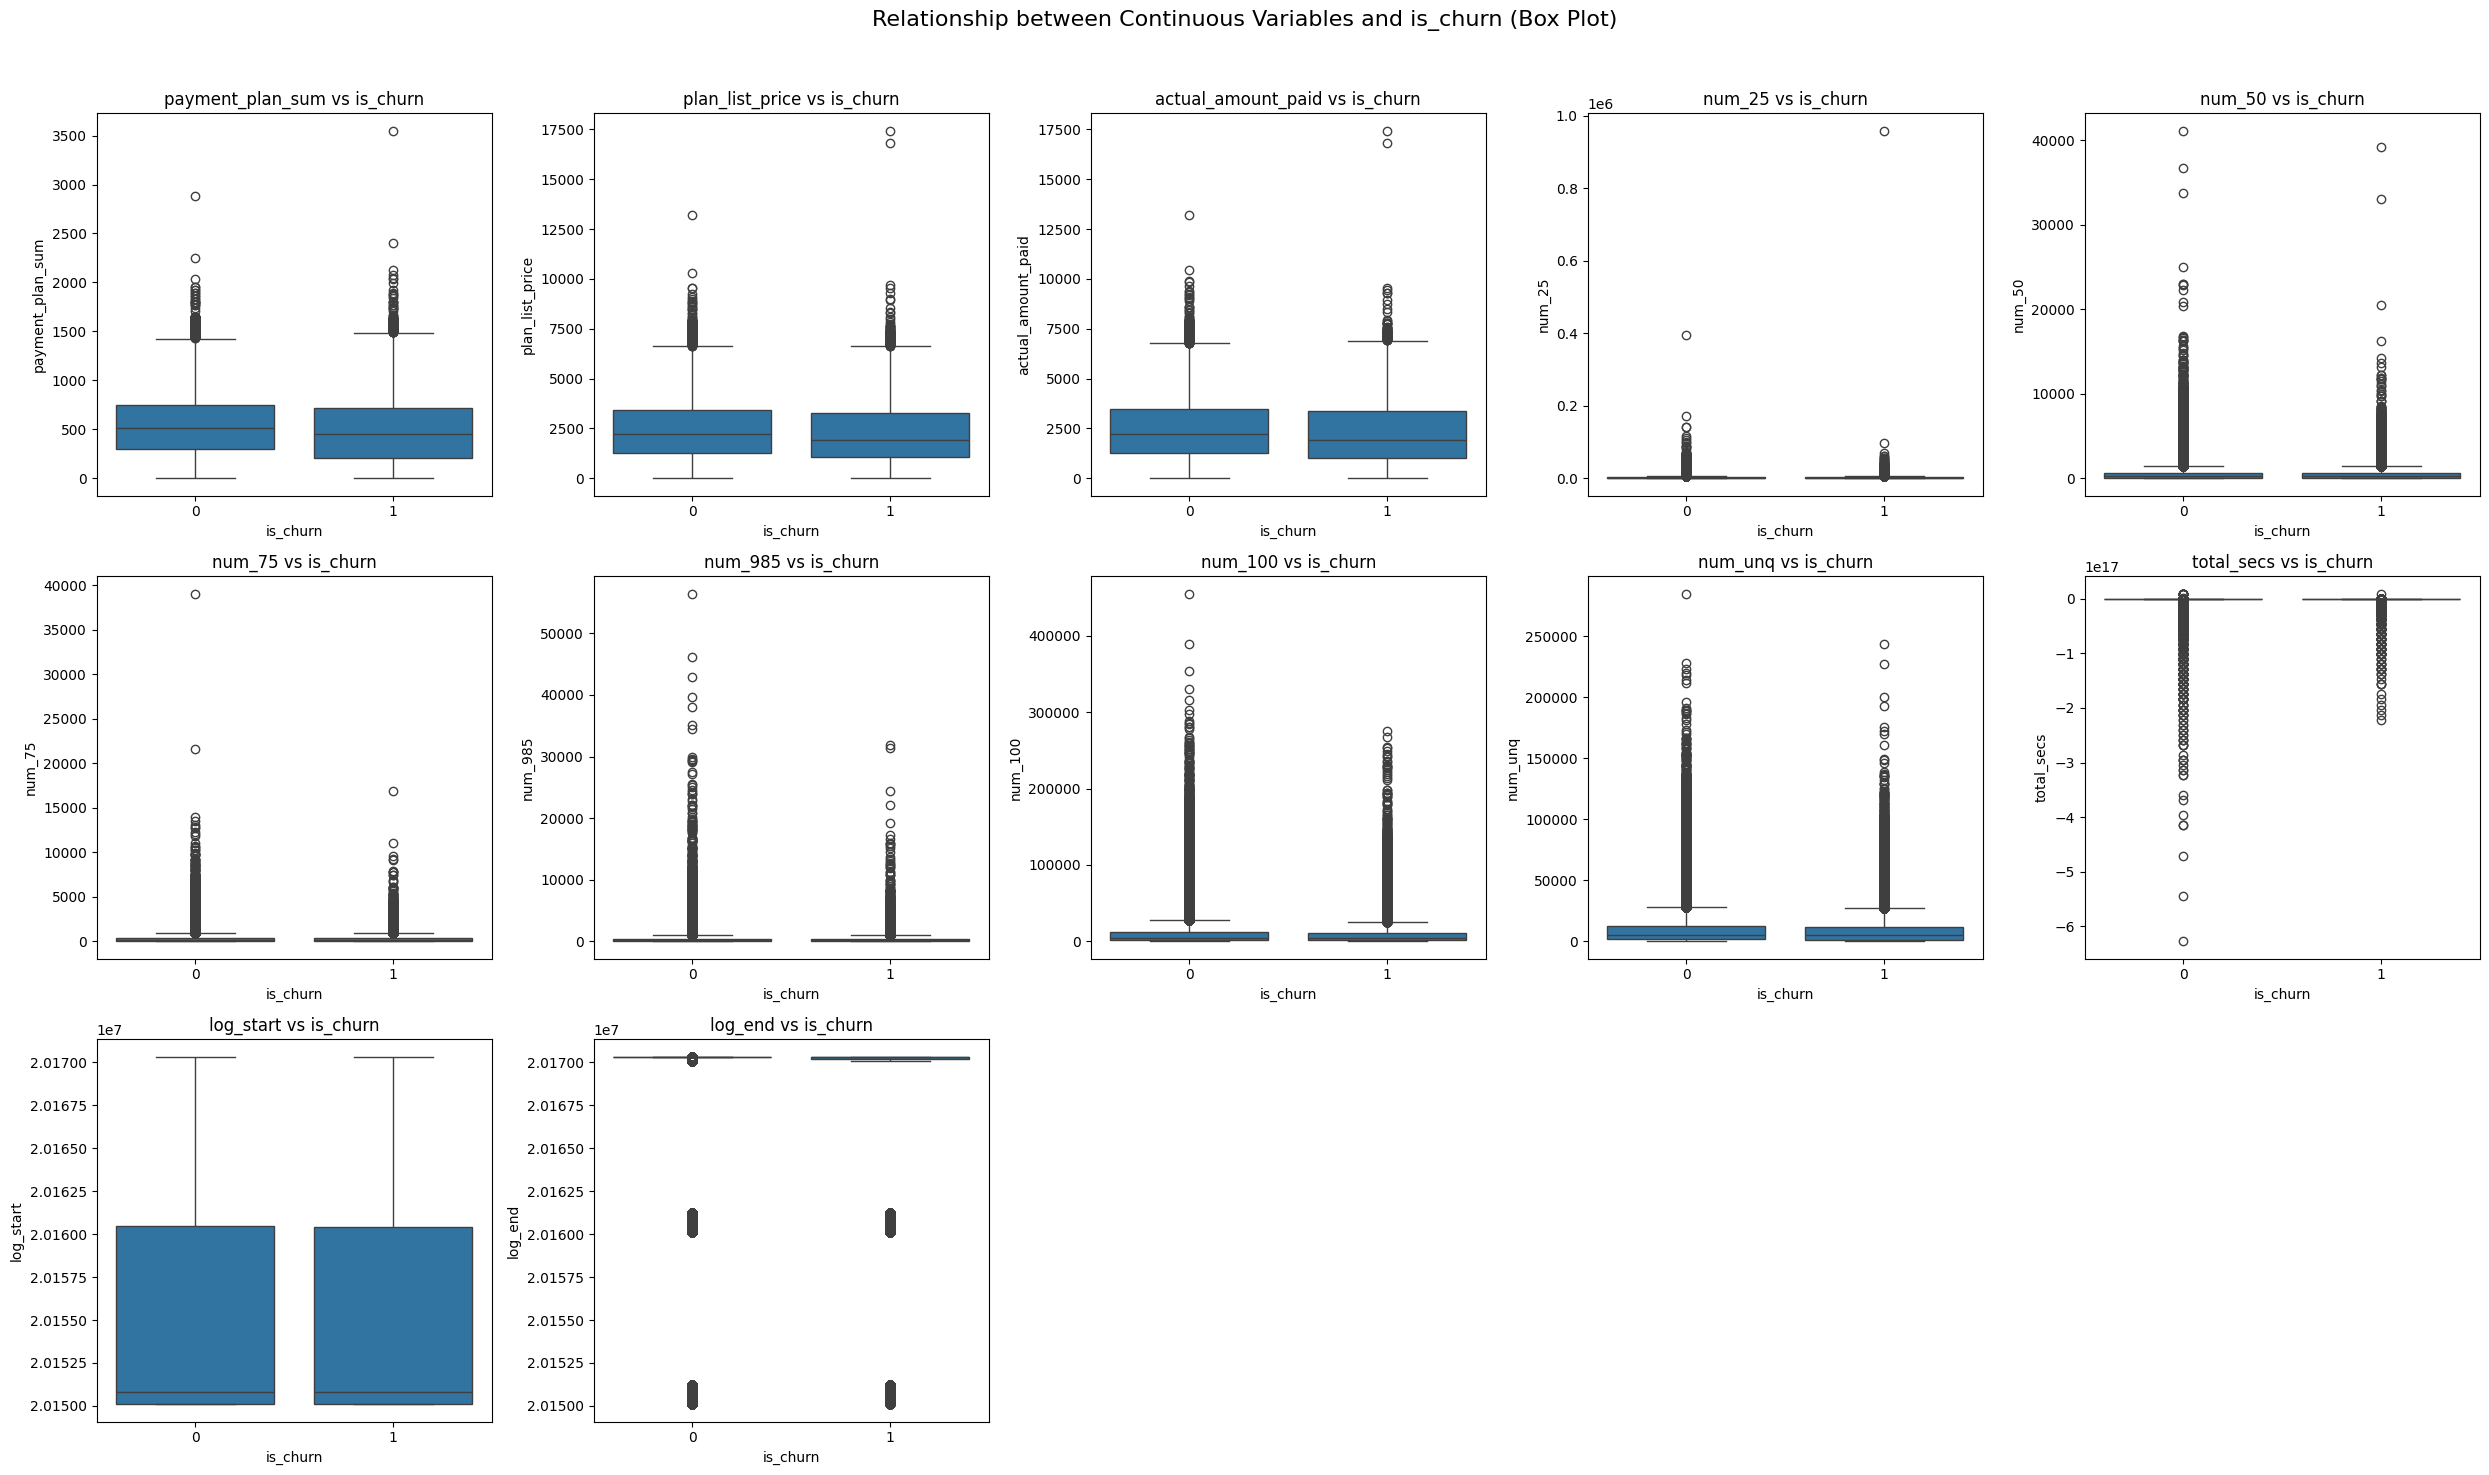

In [6]:
# 연속형 변수 목록
continuous_cols = ['payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

결측치 처리

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_data = df[~df['gender'].isna()]
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('gender',axis=1), train_data['gender'], test_size=0.3, random_state=42)

std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(X_train)
test_scaled = std_scaler.transform(X_test)
# KNN 분류 모델 훈련
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# df_fill = df.copy()

# 성별이 결측이었던 데이터 예측
# missing_data = df_fill[df_fill['gender'].isnull()]
# if not missing_data.empty:
#     predicted_genders = knn.predict(missing_data.drop('gender',axis=1))
#     print("\nKNN 모델이 예측한 성별 (결측치 부분):", predicted_genders)
    
#     # 예측된 성별을 데이터에 반영
#     df_fill.loc[df_fill['gender'].isnull(), 'gender'] = predicted_genders

# 모델 성능 평가
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nKNN 모델 정확도:", accuracy)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


gender_known = df[df['gender'].notna()]
gender_unknown = df[df['gender'].isna()].copy()  # 경고 방지를 위해 복사본 사용


features = ['city', 'bd', 'registered_via', 'is_churn', 'is_back', 'payment_plan_sum', 'plan_list_price', 
            'actual_amount_paid', 'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
            'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
            'registration_init_time_year', 'registration_init_time_month', 'registration_init_time_day',
            'membership_expire_date_year', 'membership_expire_date_month', 'membership_expire_date_day',
            'log_end_year', 'log_end_month', 'log_end_day', 'log_start_year', 'log_start_month', 'log_start_day']

X = gender_known[features]
y = gender_known['gender']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_cl = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cl.fit(X_train, y_train)